In [1]:
import sys
import os
sys.path.append("../../../../src/")
#Imports
import numpy as np
import scipy as sp
import numpy.linalg as la
import matplotlib.pyplot as plt
#Custom made imports
import single_particle_sector as sps
from time import time

In [197]:
###Functions

# def En(L, J, h, OBC):
#     bc = ["OBC", "OBC"] if OBC else ["ABC", "PBC"]
#     Es, ns = [], []

#     for p, boundary_condition in enumerate(bc):
#         H = sps.H_bdg(h, L, J, boundary_condition)
#         E, V = la.eigh(H)
#         E = E[L:]
#         V = V[:, :L]
#         G = sps.G_tfim(V)
#         F = G[:L, L:]
#         G = G[:L, :L]
#         M = np.eye(L) - 2 * (G + F)
#         n = la.det(M) * (-1) ** L * (-1) ** p
#         Es.append(E)
#         ns.append(n)
#     return Es, ns

def En(L,J,h,OBC):
    if OBC == True:
        bc = ["OBC","OBC"]
    else:
        bc = ["ABC","PBC"]
    
    ns = []
    Es = []

    for p in range(0,2):
        boundary_condition = bc[p]
        H = sps.H_bdg(h,L,J,boundary_condition)
        E, V = la.eigh(H)
        U = V.copy()
        V = V[:,:L]
        E = E[L:]
        G = sps.G_tfim(V)

        F = G[:L,L:]
        G = G[:L,:L]
        #####
        M = np.eye(L)-2*(G+F)
        n = la.det(M)*(-1)**L * (-1)**p
        Es.append(E)
        ns.append(n)
    return  Es, ns, U


def Zi(p,beta,Es,ns):
    E = sum(Es[p])
    Z =  (np.prod(1+np.exp(-beta*2*Es[p]))+ns[p]*np.prod(1-np.exp(-2*beta*Es[p])))/2
    return Z

def Z(beta,Es,ns):
   return Zi(0,beta,Es,ns)+Zi(1,beta,Es,ns)

def F(beta,Es,ns):
    return -np.log(Z(beta,Es,ns))/beta
def cap(p,mu,beta,Es,ns):
    pf = np.exp(-2*beta*Es[p][mu])/2/Z(beta,Es,ns)
    E = Es[p].copy()
    E = np.delete(E,mu)
    term1 = np.prod(1+np.exp(-2*beta*E))
    term2 = ns[p]*np.prod(1-np.exp(-2*beta*E))
    return pf*(term1-term2)


def ca(mu,beta,Es,ns):
    return cap(0,mu,beta,Es,ns)+cap(1,mu,beta,Es,ns)

def acp(p,mu,beta,Es,ns):
    pf = 1/2/Z(beta,Es,ns)
    E = Es[p].copy()
    E = np.delete(E,mu)
    term1 = np.prod(1+np.exp(-2*beta*E))
    term2 = ns[p]*np.prod(1-np.exp(-2*beta*E))

    return pf*(term1+term2)

def ac(mu,beta,Es,ns):
    return acp(0,mu,beta,Es,ns)+acp(1,mu,beta,Es,ns)
def E_p(p,beta,Es,ns):
    E = Es[p]
    Hp = sum([2*E[mu]*(ca(mu,beta,Es,ns)-1/2) for mu in range(L)])
    return Hp
def E_th(beta,Es,ns):
    return (E_p(0,beta,Es,ns)+E_p(1,beta,Es,ns))/2

In [198]:
#Model Parameters
L = 10
J = -1
h = 0
OBC = False
Es, ns ,_ = En(L,J,0,False)
Z(0.000001,Es,ns)


np.float64(1023.9897600563193)

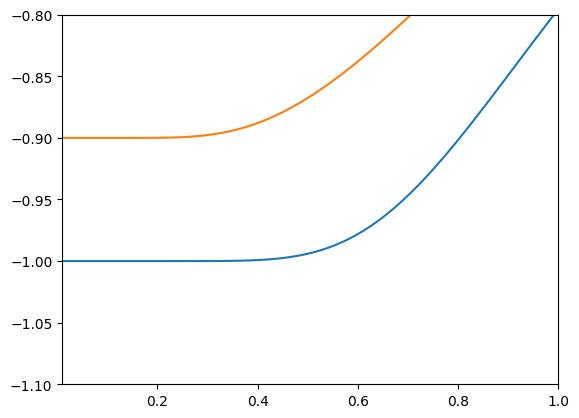

In [243]:
##Recreating Figure
T = np.linspace(0.01,1,100)
h =  0
L = 10
Es, ns,_ = En(L,J,h,OBC)
E1 = [E_th(1/ti,Es,ns)/L for ti in T]
Es, ns,_ = En(L,J,h,True)
E2 = [E_th(1/ti,Es,ns)/L for ti in T]
plt.plot(T,E1)
plt.plot(T,E2)
plt.ylim(-1.1,-.8)
plt.xlim(T[0],T[-1])
plt.show()
plt.close()

LINEAR ALGEBRA


/tmp/ipykernel_246232/1652700573.py:1: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/betas,-np.gradient(np.log(Z_beta),betas)/L)


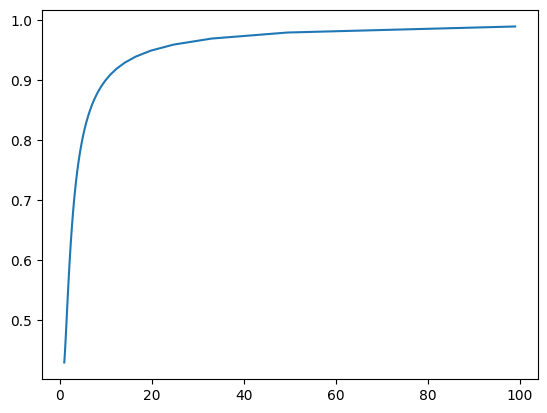

In [224]:
Es

[array([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.])]

In [229]:
M = np.eye(L)-2*(G+F)

In [230]:
la.det(M)

np.float64(0.28645994907514005)